<a href="https://colab.research.google.com/github/alemezrin/Optimizacion-I/blob/main/Metodos_de_Optimizacion_Multivariable_(Nelder_Mead_Gradiente_maximo_descenso_Gradiente_conjugado_Newton_CG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodos de Optimización Multivariable (Nelder Mead/ Gradiente maximo descenso/ Gradiente conjugado/ Newton CG)**

Analizaremos los siguientes 4 metodos que nos sirven para la obtención de minimos en funciones multivariables:

> **1.** Metodo de ***Nelder Mead***.

> **2.** Metodo de ***Gradiente (Maximo descenso)***.

> **3.** Metodo de ***Gradiente Conjugado***.

> **4.** Metodo de ***Newton CG***.

Para analizar estos metodos utilizaremos la función Rosenbrock y la función de Himmelblau.

## **Funciones de Prueba**

### **Función de Rosenbrock**

Es una función no convexa que se usa para probar los métodos de optimización o rendimiento de los algoritmos. En general se puede usar de dos variables o se puede generalizar para *n-variables*. Forma parte de un conjunto de funciones que son usadas para hacer pruebas con técnicas de optimización. Fue introducida por Howard H. Rosenbrock en 1960.​ Es también conocida como Rosenbrock la función del valle o la función del plátano.<br><br>

La función está definida por:<br><br>

$$R(x,y)=(a-x)^2+b(y-x^2)^2$$

<br>

*   Tiene un mínimo global en $(x,y)=(a,a^{2})$, donde $R(x,y)=0$.
*   Generalmente $a=1$ y $b=100$.
*   Sólo en el caso trivial de $a=0$, la función es simétrica y el mínimo está en el origen.

<br>

El Jacobiano está definido por:<br><br>

$$ J_{R} (x,y)= \begin{pmatrix} -2(a-x) - 4 x b(y-x^2 )  \\ 2b(y-x^2 )  \end{pmatrix}  $$ 

<br>

El Hessiano está definido por:<br><br>

$$ H_{R} (x,y)= \begin{pmatrix} 2 - 4b(y- x^2 ) + 8bx^2  & -4xb  \\ -4bx & 2b \end{pmatrix}  $$  

<br>
Vamos a utilizar los siguientes valores:

*   $a=0.41$
*   $b=6$

Con los valores anteriores La funcion de Rosenbrock, el Jacobiano y el Hessiano nos quedan asi:<br><br>
$$R(x,y)=(0.41-x)^2+6(y-x^2)^2$$
<br><br>
$$ J_{R} (x,y)= \begin{pmatrix} -2(0.41-x) - 24 x (y-x^2 )  \\ 12(y-x^2 )  \end{pmatrix}  $$ 
<br><br>
$$ H_{R} (x,y)= \begin{pmatrix} 2 - 24(y- x^2 ) + 48x^2  & -24x  \\ -24x & 12 \end{pmatrix}  $$  












#### ***Curvas de nivel***


In [ ]:
# Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

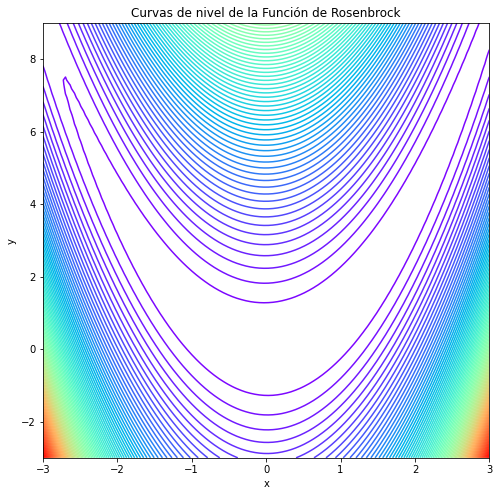

In [ ]:
# Definimos "brakets"
x_minR, x_maxR = -3, 3
y_minR, y_maxR = -3, 9 

# Definimos partición de los "brakets"
xxR = np.linspace(x_minR,x_maxR,100) # Patición x
yyR = np.linspace(y_minR,y_maxR,100) # Patición y

# Definimos malla
XR, YR = np.meshgrid(xxR, yyR)

# Definimos la función de Rosenbrock
def rosenbrock(x):
    return (0.41-x[0])**2 + 6*(x[1]-x[0]**2)**2   ## donde x es una lista de 2 elementos.

FR = rosenbrock([XR,YR])

# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curvas de nivel de la Función de Rosenbrock")

# Imprimimos las curvas de nivel
plt.show()


#### ***Grafica 3D***


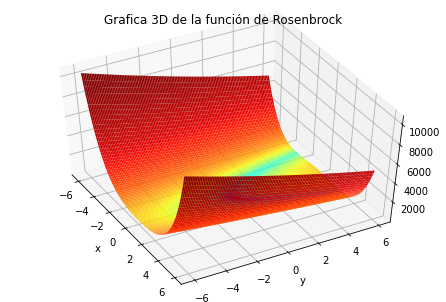

In [ ]:
# Definimos la funcion
R = lambda X,Y: (0.41-X)**2 + 6*(Y-X**2)**2;

# Inicializamos la figura
fig = plt.figure()
axR = Axes3D(fig, azim = -29, elev = 49)

# Evaluamos la funcion
XR3D = np.arange(-6, 6, 0.1)
YR3D = np.arange(-6, 6, 0.1)
XR3D, YR3D = np.meshgrid(XR3D, YR3D)
Zr = R(XR3D,YR3D)
axR.plot_surface(XR3D, YR3D, Zr, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica 3D de la función de Rosenbrock")

# Imprimimos la superficie
plt.show()

#### ***Punto de partida para el proceso de optimizacion***

In [ ]:
#Definimos el punto de partida para el proceso de optimización de Rosenbrock
x0R = [-2,2.5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0R = [x0R[0]]
liY0R = [x0R[1]]
liF0R = [rosenbrock(x0R)]

#Función store
def store1(X):
    global liX0R
    global liY0R
    global liF0R
    x, y = X
    liX0R.append(x)
    liY0R.append(y)
    liF0R.append(rosenbrock(X))

### **Funcion de Himmelblau**

La función de Himmelblau es una función multimodal, definida sobre $\mathbb {R} ^{2}$ y es usada para comprobar el rendimiento de los algoritmos de optimización.<br><br>

La función está definida por:<br><br>

$$H(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$$

<br>

Tiene una máximo local en   

*   $x=-0.270844$ 
*   $y=-0.923038$
*   donde $H(x,y)=181.616$

<br>

Y cuatro mínimos locales idénticos (también son mínimos globales):



*   $H(3.0,2.0)=0.0$
*   $H(-2.805118,3.131312)=0.0$
*   $H(-3.779310,-3.283186)=0.0$
*   $H(3.584428,-1.848126)=0.0$

<br>

El Jacobiano está definido por:<br><br>

$$ J_{H} (x,y)= \begin{pmatrix} 4x^3+4xy-42x+2y^2-14  \\ 4y^3+4xy-26y+2x^2-22 )  \end{pmatrix}  $$ 

<br>

El Hessiano está definido por:<br><br>

$$ H_{H} (x,y)= \begin{pmatrix} 12x^2+4y-42  & 4x+4y  \\ 4x+4y & 4x+12y^2-26 \end{pmatrix}  $$  

#### ***Curvas de nivel***

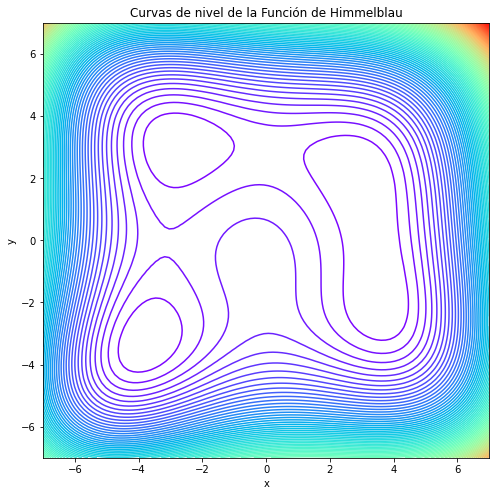

In [ ]:
# Definimos "brakets"
x_minH, x_maxH = -7, 7
y_minH, y_maxH = -7, 7 

# Definimos partición de los "brakets"
xxH = np.linspace(x_minH,x_maxH,100) # Patición x
yyH = np.linspace(y_minH,y_maxH,100) # Patición y

# Definimos malla
XH, YH = np.meshgrid(xxH, yyH)

# Definimos la función de Rosenbrock
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2;   ## donde x es una lista de 2 elementos.

FH = himmelblau([XH,YH])

# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curvas de nivel de la Función de Himmelblau")

# Imprimimos las curvas de nivel
plt.show()

#### ***Grafica 3D***

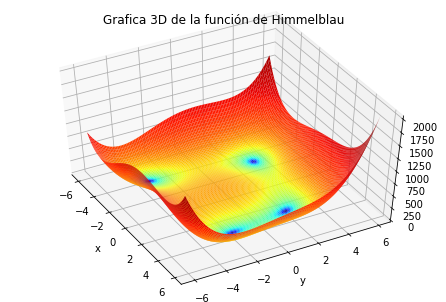

In [ ]:
# Definimos la funcion
H = lambda X,Y: (X*X+Y-11)**2 + (X+Y*Y-7)**2;

# Inicializamos la figura
fig = plt.figure()
axH = Axes3D(fig, azim = -29, elev = 49)

# Evaluamos la funcion
XH3D = np.arange(-6, 6, 0.1)
YH3D = np.arange(-6, 6, 0.1)
XH3D, YH3D = np.meshgrid(XH3D, YH3D)
Zh = H(XH3D,YH3D)
axH.plot_surface(XH3D, YH3D, Zh, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica 3D de la función de Himmelblau")

# Imprimimos la superficie
plt.show()

#### ***Punto de partida para el proceso de optimizacion***

In [ ]:
#Definimos el punto de partida para el proceso de optimización de Himmelblau
x0H = [-2,2]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0H = [x0H[0]]
liY0H = [x0H[1]]
liF0H = [himmelblau(x0H)]

#Función store
def store2(X):
    global liX0H
    global liY0H
    global liF0H
    x, y = X
    liX0H.append(x)
    liY0H.append(y)
    liF0H.append(himmelblau(X))

## **Metodo de Nelder Mead**

Este metodo fue propuesto por *John Nelder y Roger Mead*, en su primera publicación el algoritmo fue descrito en su artículo de 1965 titulado «***Un método simplex para la minimización de funciones***».<br><br>

El algoritmo *símplex Nelder-Mead* (también método simplex cuesta abajo , método ameba o método politopo) es un método numerico de búsqueda directa (basado en la comparación de funciones) para la minimización sin restricciones de funciones multidimensionales.<br><br>

El método *Nelder-Mead* trata de minimizar una función escalar no lineal de *n* variables usando sólo valores de la función, sin obtener ninguna información de la derivada (ni implícita ni explícitamente), al no requerir la derivada para su algoritmo puede ser usada para funciones no diferenciables, no continuas o con ruido.<br><br>

El método utiliza el concepto de simplex , que es un politopo especial de *n  + 1* vértices en *n* dimensiones. Los ejemplos de simples incluyen un segmento de línea en una línea, un triángulo en un plano, un tetraedro en un espacio tridimensional, etc.

<dl>
  <dt><b><i>simplex:</b></i></dt>
  <dd>Definimos símplex <i>n-dimensional</i> como una figura geométrica en dimensión $n$ de volumen no nulo, que es la envolvente convexa de $n+1$ puntos. Esto es, dados los puntos $a_1,a_2,...,a_{n+1}$ , el símplex será <br><br>
  $$ Δ = \left\lbrace x \in R^n / x=∑ _{i=1} ^{n+1} λ_i*a_i \,\,\,\, con \,\,\,\, 0 \le i \le n+1; \,\,\,\,;\,\,\,\, 0 \le λ_i \le 1;\,\,\,\, ∑ _{i=1} ^{n+1} λ_i=1 \right\rbrace$$</dd>
</dl>
<br>

Cada iteración de este método comienza con un símplex, especificado por sus *n+1* vértices y los valores de la función objetivo asociados. Tras calcular uno o más puntos de prueba y evaluar la función en dichos puntos, la iteración dará como resultado un nuevo símplex, de tal manera que los valores de la función en los vértices satisfagan de alguna forma una condición de descenso con respecto al símplex anterior. La búsqueda se detiene cuando los puntos convergen en un óptimo, cuando se observa una diferencia mínima entre evaluaciones o cuando se realiza un número máximo de evaluaciones de funciones.

<br>

Si bien el algoritmo Nelder-Mead no garantiza la convergencia en el caso general, puesto que puede estancarse en un punto no óptimo, en la práctica este método presenta unas buenas propiedades de convergencia para dimensiones bajas. Un resumen de sus ventajas y desventajas se pueden consultar en, [Nelder-Mead_algorithm](http://www.scholarpedia.org/article/Nelder-Mead_algorithm).

### **Nelder Mead en Rosenbrock**

#### ***Optimización***



In [ ]:
# Optimizamos
optimize.minimize(rosenbrock, x0R, method="Nelder-Mead", callback=store1, options={"xtol": 1e-10})

 final_simplex: (array([[0.41  , 0.1681],
       [0.41  , 0.1681],
       [0.41  , 0.1681]]), array([3.60777891e-22, 6.63651490e-21, 9.44844171e-21]))
           fun: 3.6077789139209614e-22
       message: 'Optimization terminated successfully.'
          nfev: 209
           nit: 111
        status: 0
       success: True
             x: array([0.41  , 0.1681])

Los resultados anteriores tienen el siguiente significado:


> <dl>
  <dt>final_simplex:</dt>
  <dd>Simplex final y evaluación de la función en esos puntos.</dd>
  <dt>fun:</dt>
  <dd>Evaluación de la función en el punto encontrado.</dd>
  <dt>message:</dt>
  <dd>Indica si la optimización se realizó exitosamente.</dd>
  <dt>nfev:</dt>
  <dd>Número de evaluaciones en la función realizadas por el método.</dd>
  <dt>nit:</dt>
  <dd>Cantidad de iteraciones</dd>
  <dt>status:</dt>
  <dd>Indica si el método terminó o no.</dd>
  <dt>success</dt>
  <dd>Indica si el proceso llegó o no al mínimo de la función.</dd>
  <dt>x:</dt>
  <dd>Es el último punto donde se evaluó la función, el mínimo.
</dd>
</dl>

<br>

#### ***Grafica de Optimización***

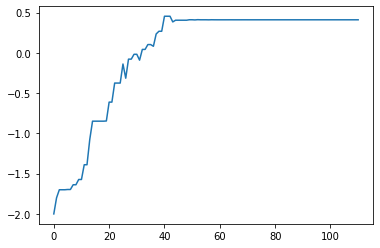

In [ ]:
plt.plot(liX0R)

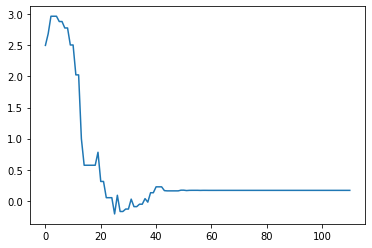

In [ ]:
plt.plot(liY0R)

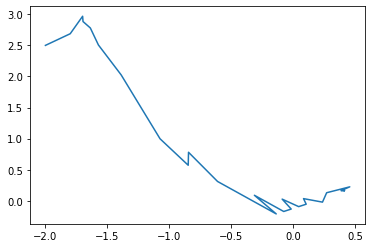

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0R, liY0R)

#### ***Grafica de Optimización sobre las curvas de nivel***

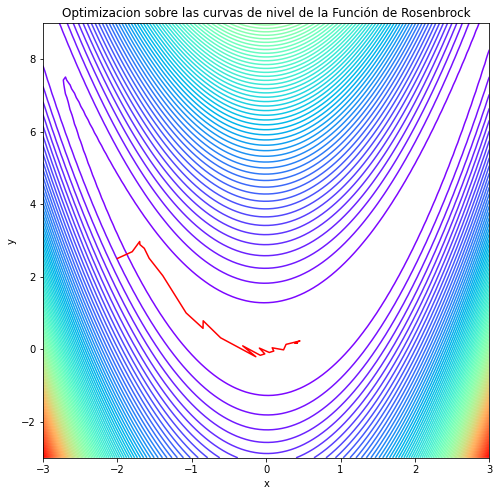

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0R,liY0R, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Rosenbrock")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

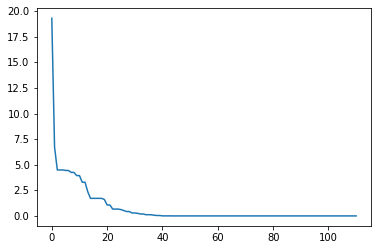

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0R))

### **Nelder Mead en Himmelblau**

#### ***Optimización***

In [ ]:
# Optimizamos
optimize.minimize(himmelblau, x0H, method="Nelder-Mead", callback=store2, options={"xtol": 1e-10})


 final_simplex: (array([[-2.80511809,  3.13131252],
       [-2.80511809,  3.13131252],
       [-2.80511809,  3.13131252]]), array([3.60868079e-20, 1.74549256e-19, 2.66815922e-19]))
           fun: 3.6086807851283255e-20
       message: 'Optimization terminated successfully.'
          nfev: 157
           nit: 82
        status: 0
       success: True
             x: array([-2.80511809,  3.13131252])

#### ***Grafica de Optimización***

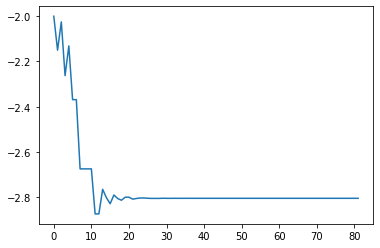

In [ ]:
plt.plot(liX0H)

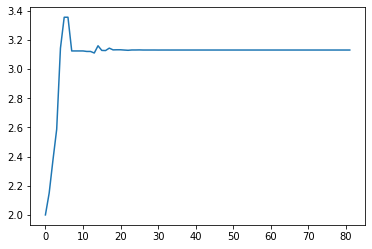

In [ ]:
plt.plot(liY0H)

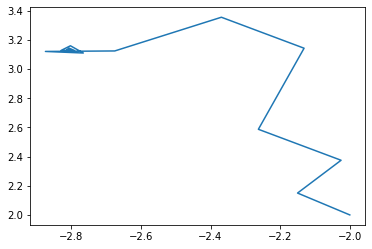

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0H, liY0H)

#### ***Grafica de Optimización sobre las curvas de nivel***

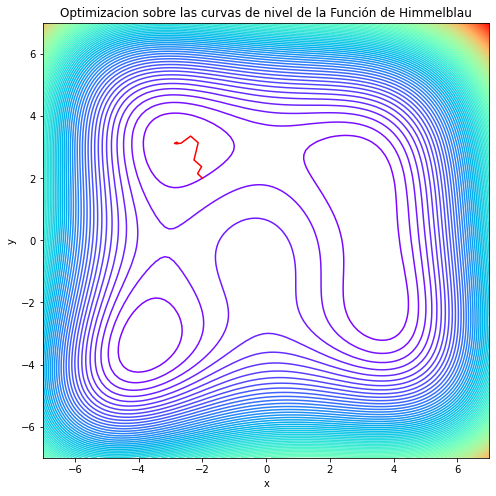

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0H,liY0H, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Himmelblau")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

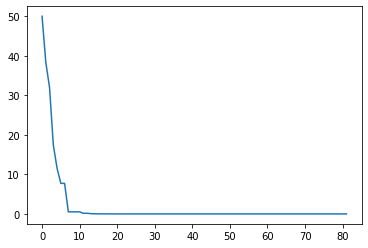

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0H))

## **Metodo de Gradiente (Maximo descenso)**

El gradiente de $f$ evaluado en $x$, denotado por $∇f(x)$, es una función de valor vectorial cuya ***i-ésima*** función componente es la derivada parcial de $f$ con respecto a $x_i$, $\frac{∂f(x)}{∂x_i}$.

<BR>

El gradiente es un vector en un punto $x$ que proporciona la dirección (local) de máxima variación de la función. El vector gradiente es un vector ortogonal al contorno de la función en el punto.

<br>

A partir del cálculo, sabemos que en un punto $x$ dado donde el vector gradiente es distinto de cero, el gradiente negativo, $-∇f(x)$, apunta cuesta abajo hacia valores más bajos de la función $f$. De hecho, $-∇f(x)$ es localmente la dirección de mayor descenso de la función $f$ en el sentido de que el valor de la función decrece más rápidamente en la dirección del gradiente negativo que en cualquier otra dirección. Por lo tanto en la búsqueda de un mínimo la dirección de movimiento será contragradiente.

<br>

Partiendo de una suposición inicial $x_0$, cada solución aproximada sucesiva viene dada por la transición de un punto $x_n$ a otro $x_{n+1}$ segun la siguiente expresión:

<br>

$$x_{n+1} = x_n - \alpha_n ∇f(x_n)$$

<br>

Donde $\alpha_n$ es un parametro de busqueda que determina la longitud de paso, que tan lejos ir en la direccion del maximo descenso $∇f(x_n)$.

<br>

Funciona bien si la función es convexa, ya que el método estimará el mínimo global. El método es muy sensible a la elección del punto inicial para hacer la estimación y como depende de un parámetro para ir haciendo los avances, es susceptible a malas elecciones de él.

<br>

El algoritmo práctico lo podemos resumir en los siguientes pasos:


> **1.** Elegir un valor inicial $x_0$. En pasos sucesivos será $x_n$.<br><br>
**2.** Calcular, analítica o numéricamente las derivadas parciales
$$\frac{∂f(x)}{∂x_i},  \,\, i=1,2,3,...,n$$<br>
**3.** Calcular el vector de búsqueda
$$-∇f(x_n)$$<br>
**4.** Usar la relación 
$$x_{n+1} = x_n - \alpha_n ∇f(x_n)$$ para obtener el siguiente punto. El valor de $\alpha_n$ puede ser de valor fijo o calculado en cada paso mediante una búsqueda unidireccional.<br><br>
**5.** Comparar $f (x_{n +1})$ con $f (x_n )$ . Si el cambio es menor que una tolerancia preespecificada terminar, en caso contrario volver al paso dos y continuar con las iteraciones.

<br>

El metodo es muy confiable siempre que la pendiente sea distinta de cero porque siempre puede progresar. Pero el método es bastante miope en su visión del comportamiento de la función, y las iteraciones resultantes pueden zigzaguear de un lado a otro, haciendo un progreso muy lento hacia una solución. En general, la tasa de convergencia de este metodo es solo lineal, con un factor constante que puede ser arbitrariamente cercano a 1.


### **El Gradiente en Rosenbrock**

#### ***Optimización***



In [ ]:
#Defino el gradiente de la función de rosenbrock
def Drosenbrock(x):
  return np.array([-2*(0.41-x[0])-24*x[0]*(x[1]-x[0]**2), 12*(x[1]-x[0]**2) ])

#Hago el análisis para la función de Rosenbrock.

liXros = []
liYros = []
liFros = []
def gradient_descent(x0R, rosenbrock, Drosenbrock):
  x_iros, y_iros = x0R
  for i in range(1,100):
    liXros.append(x_iros)
    liYros.append(y_iros)
    liFros.append(rosenbrock([x_iros,y_iros]))
    dx_iros, dy_iros= Drosenbrock([x_iros,y_iros])
    alpha = optimize.line_search(rosenbrock, Drosenbrock, np.array([x_iros,y_iros]), -np.array([dx_iros, dy_iros])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_iros += - alpha*dx_iros  # x_iros = x_iros - alpha * dx_i
    y_iros += - alpha*dy_iros
    if np.abs(liFros[-1]) < 1e-10:
      break

# Intervalo del gradiente (maximo descenso))
gradient_descent([-2.5, 5], rosenbrock, Drosenbrock)

In [ ]:
# Iteraciones
len(liFros)-1

95

#### ***Grafica de Optimización***

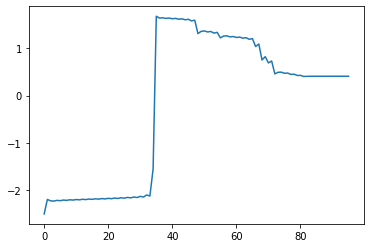

In [ ]:
plt.plot(liXros)

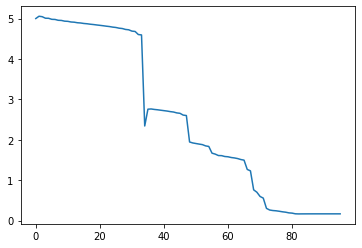

In [ ]:
plt.plot(liYros)

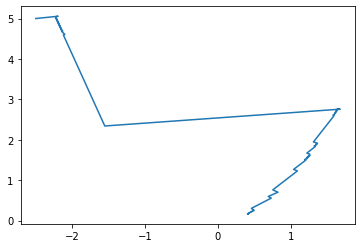

In [ ]:
# Imprimimos Optimizacion
plt.plot(liXros,liYros)

#### ***Grafica de Optimización sobre las curvas de nivel***

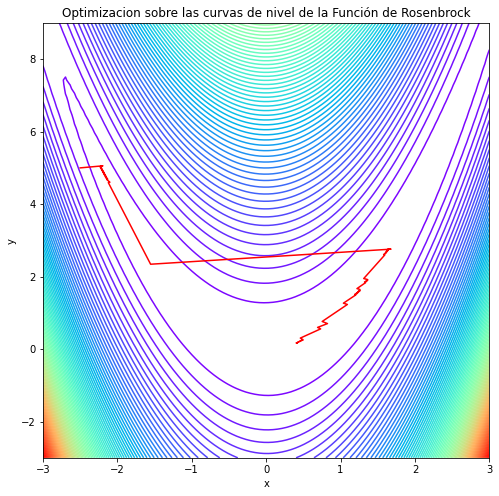

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liXros,liYros, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Rosenbrock")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

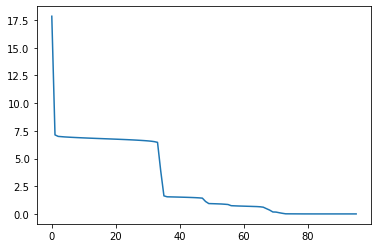

In [ ]:
# Error Absoluto
plt.plot(np.abs(liFros))

### **El Gradiente en Himmelblau**

#### ***Optimización***



In [ ]:
#Defino el gradiente de la función de Himmelblau
def Dhimmelblau(x):
  return np.array([4*x[0]**3+4*x[0]*x[1]-42*x[0]+2*x[1]**2-14, 4*x[1]**3+4*x[0]*x[1]-26*x[1]+2*x[0]**2-22])

#Hago el análisis para la función de Himmelblau.

liXhim = []
liYhim = []
liFhim = []
def gradient_descent(x0H, himmelblau, Dhimmelblau):
  x_ihim, y_ihim = x0H
  for i in range(1,100):
    liXhim.append(x_ihim)
    liYhim.append(y_ihim)
    liFhim.append(himmelblau([x_ihim,y_ihim]))
    dx_ihim, dy_ihim= Dhimmelblau([x_ihim,y_ihim])
    alpha = optimize.line_search(himmelblau, Dhimmelblau, np.array([x_ihim,y_ihim]), -np.array([dx_ihim, dy_ihim])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_ihim += - alpha*dx_ihim  # x_ihim = x_ihim - alpha * dx_ihim
    y_ihim += - alpha*dy_ihim
    if np.abs(liFhim[-1]) < 1e-10:
      break

# Intervalo del gradiente (maximo descenso))
gradient_descent([-2, 2], himmelblau, Dhimmelblau)

In [ ]:
# Iteracciones
len(liFhim)-1

7

#### ***Grafica de Optimización***

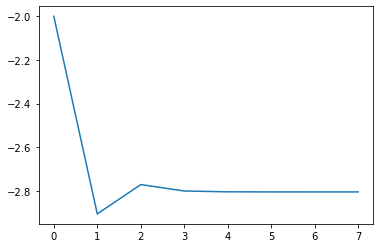

In [ ]:
plt.plot(liXhim)

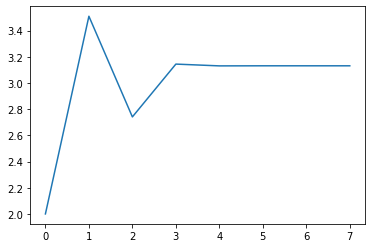

In [ ]:
plt.plot(liYhim)

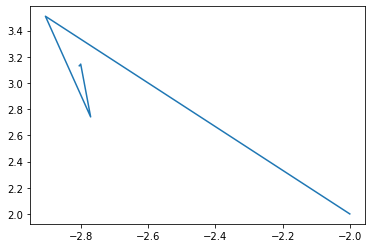

In [ ]:
# Imprimimos Optimizacion
plt.plot(liXhim,liYhim)

#### ***Grafica de Optimización sobre las curvas de nivel***

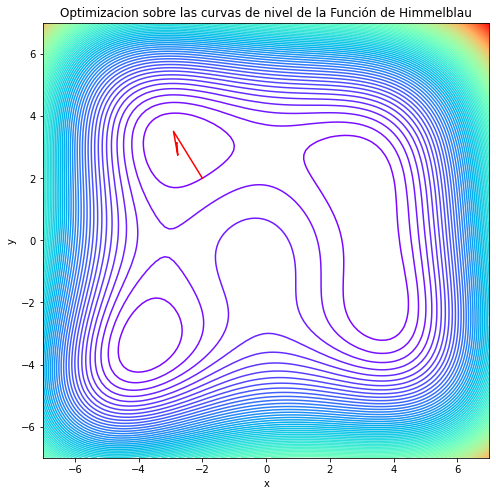

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liXhim,liYhim, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Himmelblau")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

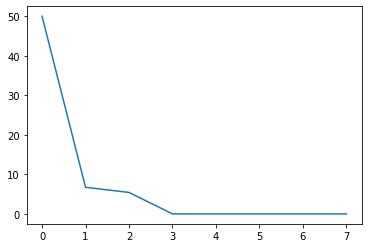

In [ ]:
# Error Absoluto
plt.plot(np.abs(liFhim))

## **Metodo de Gradiente Conjugado**

El método del gradiente conjugado debido a Fletcher y Reeves (1964) combina las características de la convergencia cuadrática del método de las direcciones conjugadas con las del método del gradiente. El método del gradiente conjugado es otra alternativa al método de Newton que no requiere segundas derivadas explícitas.

<br>

Como vimos anteriormente, el método del Gradiente (Maximo Descenso) tiende a buscar en las mismas direcciones repetidamente, lo que lleva a una convergencia muy lenta. Como sugiere su nombre, el método del Gradiente Conjugado también usa gradientes, pero evita búsquedas repetidas modificando el gradiente en cada paso para eliminar componentes en direcciones anteriores. La secuencia resultante de direcciones de búsqueda conjugadas (es decir, ortogonales en algún producto interno) acumula implícitamente información sobre la matriz hessiana a medida que avanzan las iteraciones. Teóricamente, el método es exacto después de un máximo de $n$ iteraciones para una función objetivo cuadrática en $n$ dimensiones, pero también suele ser bastante efectivo para problemas de minimización sin restricciones más generales. 

<br>

El algoritmo práctico lo podemos resumir en los siguientes pasos:

>**1.** En $x_0$ (punto inicial) calcular $f(x_0)$ y calcular $s_0= -∇f(x_0)$.<br><br>
**2.** Almacenar $∇f(x_0)$ y calcular $x_1=x_0 + \alpha_0 s_0$ minimizando $\alpha$ mediante una búsqueda unidireccional en la dirección $s_0$. <br><br>
**3.** Calcular $f(x_1)∇f(x_1)$ la nueva dirección de búsqueda es una combinación lineal de $s_0$ y $∇f(x_1)$:
$s_1=-∇f(x_1) + s_0 \frac{∇^T f(x_1) ∇f(x_1)}{∇^T f(x_0) ∇f(x_0)}$<br>
para la etapa n-ésima la relación es:
$s_1=-∇f(x_n) + s_n \frac{∇^T f(x_n) ∇f(x_n)}{∇^T f(x_n) ∇f(x_n)}$<br>
Para una función cuadrática se puede demostrar que dos direcciones de búsqueda son conjugadas. Después de $n$ iteraciones conviene comenzar otra vez desde el principio tomando el último punto $n$ como nuevo punto de partida.<br><br>
**4.** Realizar el test de convergencia, (la función objetivo ha disminuido), y terminar el algoritmo cuando $||s_n||$ sea menor que alguna tolerancia preestablecida.

<br>

La principal ventaja del método es que necesita almacenar muy poca cantidad de información con lo que puede ser programado fácilmente incluso en calculadoras. Es adecuado para funciones no lineales de varias variables. Igual que otros métodos su eficiencia se ve mermada ante una mala elección del punto inicial en  funciones no  convexas, pero una de sus ventajas es que no hace uso de la matriz Hessiana en su algoritmo lo cual permite hacer uso del método para funciones de muchas variables de manera eficiente.



### **El Gradiente Conjugado en Rosenbrock**

#### ***Optimización***



In [ ]:
#Definimos el punto de partida para el proceso de optimización de Rosenbrock
x0RCG = [-2,2.5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0RCG = [x0RCG[0]]
liY0RCG = [x0RCG[1]]
liF0RCG = [rosenbrock(x0RCG)]

#Función store
def storeROSCG(X):
    global liX0RCG
    global liY0RCG
    global liF0RCG
    x, y = X
    liX0RCG.append(x)
    liY0RCG.append(y)
    liF0RCG.append(rosenbrock(X))

# Optimizamos
optimize.minimize(rosenbrock, x0RCG, method="CG", callback=storeROSCG, options={"ftol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: OptimizeWarning: Unknown solver options: ftol


     fun: 6.010532577724382e-14
     jac: array([ 7.64331061e-07, -1.00143613e-06])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 16
    njev: 33
  status: 0
 success: True
       x: array([0.4099999 , 0.16809982])

#### ***Grafica de Optimización***

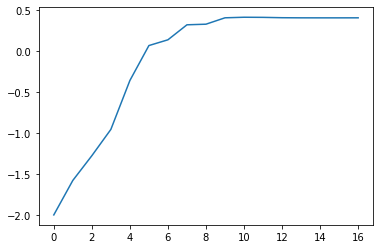

In [ ]:
plt.plot(liX0RCG)

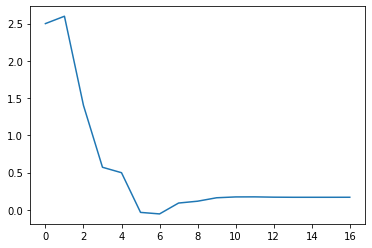

In [ ]:
plt.plot(liY0RCG)

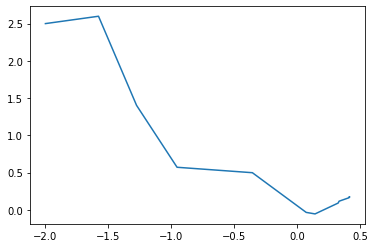

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0RCG,liY0RCG)

#### ***Grafica de Optimización sobre las curvas de nivel***

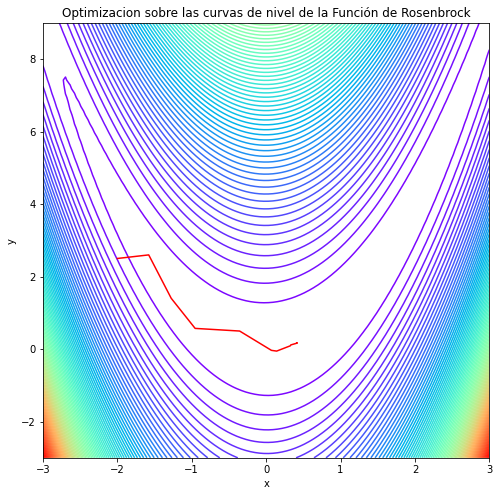

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0RCG,liY0RCG, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Rosenbrock")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

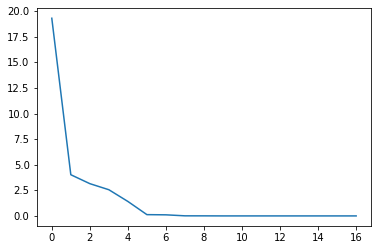

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0RCG))

### **El Gradiente Conjugado en Himmelblau**

#### ***Optimización***



In [ ]:
#Definimos el punto de partida para el proceso de optimización de Himmelblau
x0HCG = [-6,6]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0HCG = [x0HCG[0]]
liY0HCG = [x0HCG[1]]
liF0HCG = [himmelblau(x0HCG)]

#Función store
def storeHIMCG(X):
    global liX0HCG
    global liY0HCG
    global liF0HCG
    x, y = X
    liX0HCG.append(x)
    liY0HCG.append(y)
    liF0HCG.append(himmelblau(X))

# Optimizamos
optimize.minimize(himmelblau, x0RCG, method="CG", callback=storeHIMCG, options={"ftol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: OptimizeWarning: Unknown solver options: ftol


     fun: 2.5926780142476126e-15
     jac: array([1.67993060e-07, 5.13119244e-08])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 7
    njev: 14
  status: 0
 success: True
       x: array([-2.80511809,  3.13131251])

#### ***Grafica de Optimización***

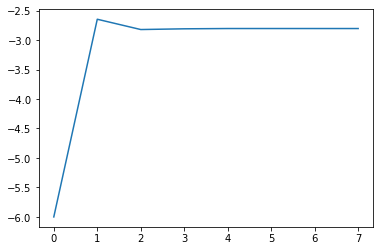

In [ ]:
plt.plot(liX0HCG)

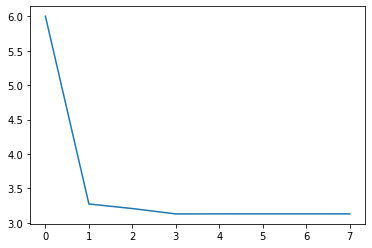

In [ ]:
plt.plot(liY0HCG)

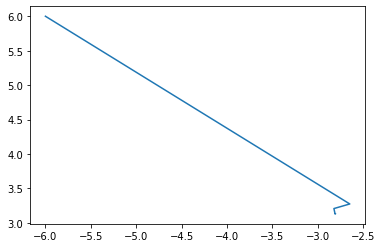

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0HCG,liY0HCG)

#### ***Grafica de Optimización sobre las curvas de nivel***

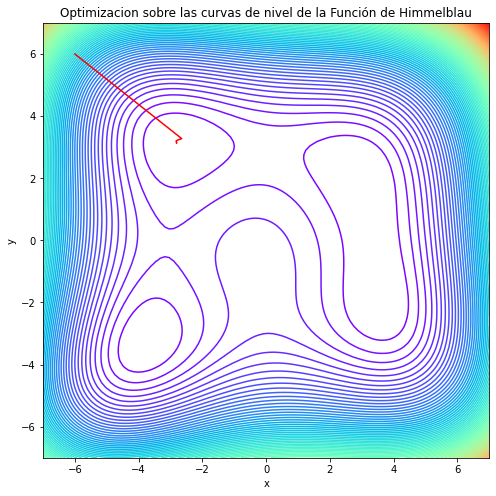

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0HCG,liY0HCG, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Himmelblau")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

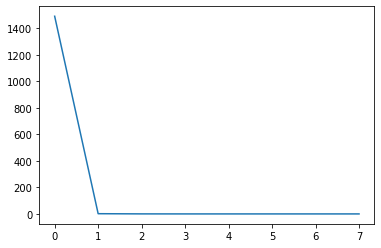

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0HCG))

## **Metodo de Newton GC**

El método de Newton CG hace uso de la aproximación de segundo orden de la función utilizando las derivadas segundas con respecto a cada una de las variables independientes. De esta forma es posible tener en cuenta la curvatura de la función en el punto e identificar las mejores direcciones de búsqueda.

En el caso de la optimización multidimensional, buscamos un cero del gradiente. Por lo tanto, el esquema de iteración del método de Newton CG tiene la forma

<br>

$$x_{n+1} = x_n - H^1_f(x_n) ∇f(x_n)$$

<br>

Donde $H_f(x)$ es la matrix Hessiana de segundas derivadas parciales de $f$

<br>

$$\left\lbrace  H_f(x) \right\rbrace_{ij} = \frac{∂x^2 f(x)}{∂x_i ∂x_j} $$

<br>

Evaluado en $x_n$. Como de costumbre, no invertimos explícitamente la matriz hessiana, sino que la usamos para resolver un sistema lineal

<br>

$$H_f(x_n) s_n = -∇f(x_n) $$

<br>

para $s_n$, luego tomar como siguiente iteración

<br>

$$x_n+1 = x_n + s_n$$

<br>

La tasa de convergencia del método de Newton CG para la minimización es normalmente cuadrática. Sin embargo, como de costumbre, el método de Newton CG no es fiable a menos que se comience lo suficientemente cerca de la solución.

### **Newton CG en Rosenbrock**

#### ***Optimización***



In [ ]:
# Definición del Jacobiono de la función de Rosenbrock
def JRos(x):
  der = np.zeros_like(x)
  der[0]= -2*(0.41-x[0]) - 4*x[0]*6*(x[1] - x[0]**2)
  der[1]= 2*6*(x[1] - x[0]**2)
  return der

# Definición la Hessiana de la función de Rosenbrock
def HRos(x):
  x = np.asarray(x)
  H = np.diag([2-4*6*(x[1]-x[0]**2) + 8*6*(x[0]**2) , 2*6 ])
  H[1,0]= -4*6*x[0]
  H[0,1]= -4*6*x[0]
  return H

#Definimos el punto de partida para el proceso de optimización de Rosenbrock
x0RNEWCG = [-2,2.5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0RNEWCG = [x0RNEWCG[0]]
liY0RNEWCG = [x0RNEWCG[1]]
liF0RNEWCG = [rosenbrock(x0RNEWCG)]

#Función store
def storeROSNEWCG(X):
    global liX0RNEWCG
    global liY0RNEWCG
    global liF0RNEWCG
    x, y = X
    liX0RNEWCG.append(x)
    liY0RNEWCG.append(y)
    liF0RNEWCG.append(rosenbrock(X))

# Optimizamos
optimize.minimize(rosenbrock, x0RNEWCG, jac=JRos, hess=HRos, method="Newton-CG", callback=storeROSNEWCG, options={'xtol': 1e-10, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 32
         Hessian evaluations: 15


     fun: 7.083143087157391e-26
     jac: array([ 2.78987944e-13, -8.37663272e-13])
 message: 'Optimization terminated successfully.'
    nfev: 18
    nhev: 15
     nit: 15
    njev: 32
  status: 0
 success: True
       x: array([0.41  , 0.1681])

#### ***Grafica de Optimización***

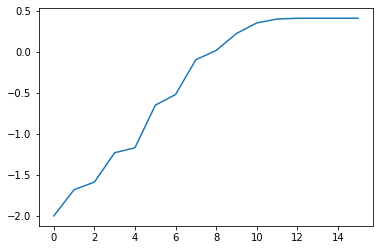

In [ ]:
plt.plot(liX0RNEWCG)

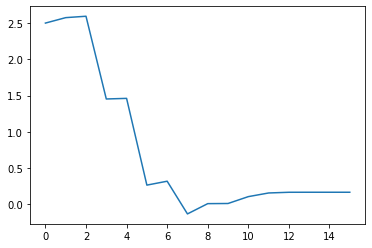

In [ ]:
plt.plot(liY0RNEWCG)

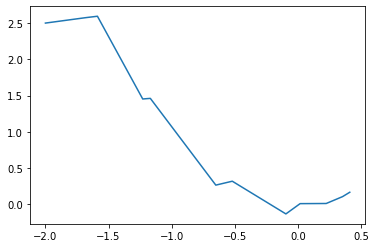

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0RNEWCG,liY0RNEWCG)

#### ***Grafica de Optimización sobre las curvas de nivel***

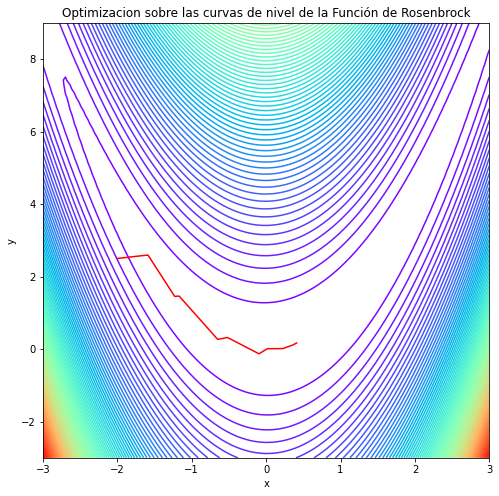

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0RNEWCG,liY0RNEWCG, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Rosenbrock")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

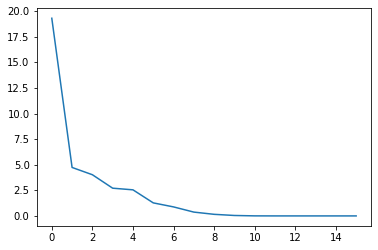

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0RNEWCG))

### **Newton CG en Himmelblau**

#### ***Optimización***



In [ ]:
# Definición del Jacobiono de la función de Himmelblau
def JHim(x):
  der = np.zeros_like(x)
  der[0]= 4*x[0]**3+4*x[0]*x[1]-42*x[0]+2*x[1]**2-14
  der[1]= 4*x[1]**3+4*x[0]*x[1]-26*x[1]+2*x[0]**2-22
  return der

# Definición la Hessiana de la función de Himmelblau
def HHim(x):
  x = np.asarray(x)
  H = np.diag([12*x[0]**2+4*x[1]-42 , 4*x[0]+12*x[1]**2-26 ])
  H[1,0]= 4*x[0]+4*x[1]
  H[0,1]= 4*x[0]+4*x[1]
  return H
#Definimos el punto de partida para el proceso de optimización de Himmelblau
x0HNEWCG = [-6,6]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0HNEWCG = [x0HNEWCG[0]]
liY0HNEWCG = [x0HNEWCG[1]]
liF0HNEWCG = [himmelblau(x0HNEWCG)]

#Función store
def storeHIMNEWCG(X):
    global liX0HNEWCG
    global liY0HNEWCG
    global liF0HNEWCG
    x, y = X
    liX0HNEWCG.append(x)
    liY0HNEWCG.append(y)
    liF0HNEWCG.append(himmelblau(X))

# Optimizamos
optimize.minimize(himmelblau, x0HNEWCG, jac=JHim, hess=HHim, method="Newton-CG", callback=storeHIMNEWCG, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8


     fun: 7.888609052210118e-31
     jac: array([-1.99968042e-07,  5.84763029e-08])
 message: 'Optimization terminated successfully.'
    nfev: 9
    nhev: 8
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([-2.80511809,  3.13131252])

#### ***Grafica de Optimización***

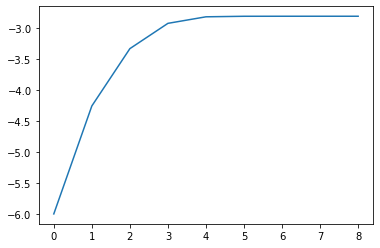

In [ ]:
plt.plot(liX0HNEWCG)

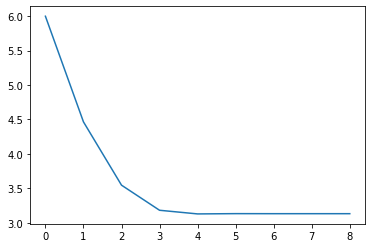

In [ ]:
plt.plot(liY0HNEWCG)

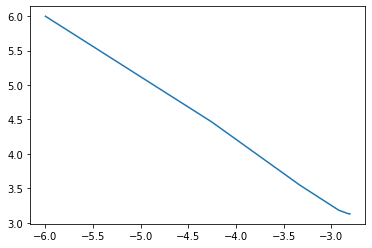

In [ ]:
# Imprimimos Optimizacion
plt.plot(liX0HNEWCG,liY0HNEWCG)

#### ***Grafica de Optimización sobre las curvas de nivel***

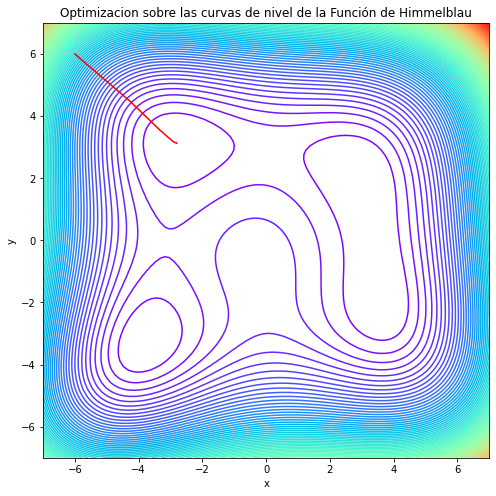

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0HNEWCG,liY0HNEWCG, color='red')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion sobre las curvas de nivel de la Función de Himmelblau")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

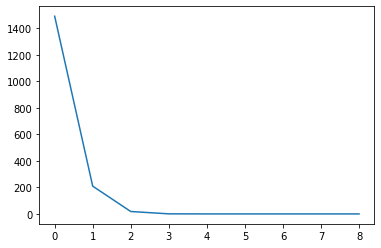

In [ ]:
# Error Absoluto
plt.plot(np.abs(liF0HNEWCG))

## **Comparacion de Metodos (Conclusiones)**

### **Función de Rosenbrock**

#### ***Optimización***
<table>
  <tr>
    <th> Metodo </th>
    <th> # Iteracciones </th>
  </tr>

  <tr>
    <td>Nelder-Mead</td>
    <td>111</td>
  </tr>

  <tr>
    <td>Gradiente (Maximo descenso)</td>
    <td>95</td> 
  </tr>

  <tr>
    <td> Gradiente Conjugado (CG)</td>
    <td>16</td>
  </tr>

  <tr>
    <td>Newton CG</td>
    <td>15</td>
  </tr>
</table>

<br>

Como podemos observar en la tabla anterior el metodo de **Newton CG** es el que menos iteracciones utiliza concluyendo que tiene una mayor rapidez de convergencia en la funcion Rosenbrock.

#### ***Grafica de Optimización***

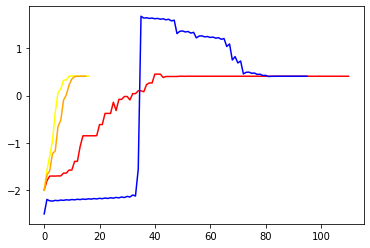

In [ ]:
plt.plot(liX0R, color='red') # Nelder-Mead
plt.plot(liXros, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0RCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0RNEWCG, color='orange') #Newton CG

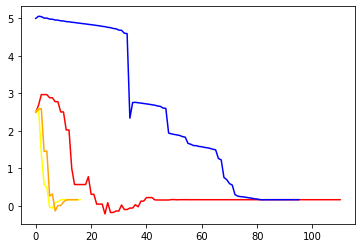

In [ ]:
plt.plot(liY0R, color='red') # Nelder-Mead
plt.plot(liYros, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liY0RCG, color='yellow') # Gradiente Conjugado
plt.plot(liY0RNEWCG, color='orange') #Newton CG

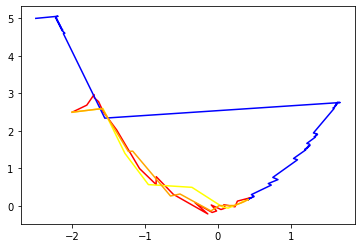

In [ ]:
plt.plot(liX0R, liY0R, color='red') # Nelder-Mead
plt.plot(liXros, liYros, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0RCG, liY0RCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0RNEWCG, liY0RNEWCG, color='orange') #Newton CG

#### ***Grafica de Optimización sobre las curvas de nivel***

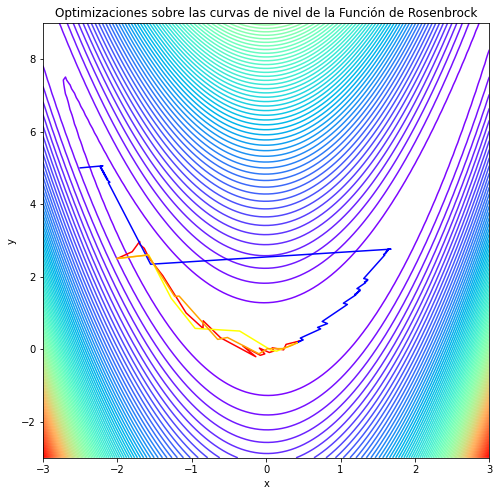

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XR, YR, FR, 100, cmap="rainbow") #coolwarm linestyles="dotted"

plt.plot(liX0R, liY0R, color='red') # Nelder-Mead
plt.plot(liXros, liYros, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0RCG, liY0RCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0RNEWCG, liY0RNEWCG, color='orange') #Newton CG

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizaciones sobre las curvas de nivel de la Función de Rosenbrock")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

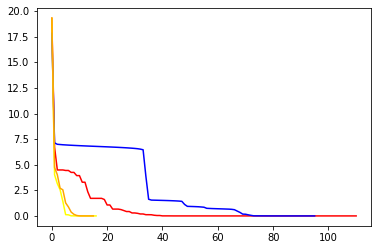

In [ ]:
# Errores Absolutos
plt.plot(np.abs(liF0R), color='red') # Nelder-Mead
plt.plot(np.abs(liFros), color='blue') # Gradiente (Maximo Descenso)
plt.plot(np.abs(liF0RCG), color='yellow') # Gradiente Conjugado
plt.plot(np.abs(liF0RNEWCG), color='orange') #Newton CG

De la grafica de los Errores Absolutos en la funcion de Rosenbrock podemos concluir lo siguiente:


1.   En el metodo de Nelder Mead el error se estabiliza en aproximadamente 40 iteracciones, pero comparado con el total de iteracciones que son 111 se estabiliza muy rapido, en un 36.0% de estas.
2.   En el metodo del Gradiente (Maximo Descenso) el error se demora muchisimo en estabilizarse aproximadamente 70 iteracciones de las 95 que utiliza, en un 73.7% de estas .
3.   En el metodo del Gradiente Conjugado el error se estabiliza aproximadamente en 8 iteracciones de las 16 que utiliza, en un 50% de estas.
4.   En el metodo de Newton CG el error se estabiliza aproximadamente en 9 iteracciones de las 15 que utiliza, en un 60% de estas.
5.   Podemos decir que el metodo que menos iteracciones utilizo para estabilizar el error fue el metodo del Gradiente Conjugado.
6.   Podemos decir que el metodo mas rapido comparado con el numero de iteracciones para estabilizar el error es el metodo Nelder Mead.

### **Función de Himmelblau**

#### ***Optimización***
<table>
  <tr>
    <th> Metodo </th>
    <th> # Iteracciones </th>
  </tr>

  <tr>
    <td>Nelder-Mead</td>
    <td>82</td>
  </tr>

  <tr>
    <td>Gradiente (Maximo descenso)</td>
    <td>7</td> 
  </tr>

  <tr>
    <td> Gradiente Conjugado (CG)</td>
    <td>7</td>
  </tr>

  <tr>
    <td>Newton CG</td>
    <td>8</td>
  </tr>
</table>

<br>

Como podemos observar en la tabla anterior el metodo del **Gradiente Conjugado** es el que menos iteracciones utiliza concluyendo que tiene una mayor rapidez de convergencia en la funcion Himmelblau.

#### ***Grafica de Optimización***

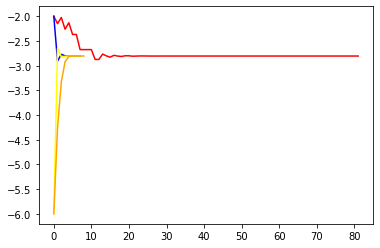

In [ ]:
plt.plot(liX0H, color='red') # Nelder-Mead
plt.plot(liXhim, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0HCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0HNEWCG, color='orange') #Newton CG

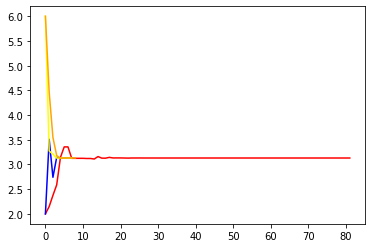

In [ ]:
plt.plot(liY0H, color='red') # Nelder-Mead
plt.plot(liYhim, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liY0HCG, color='yellow') # Gradiente Conjugado
plt.plot(liY0HNEWCG, color='orange') #Newton CG

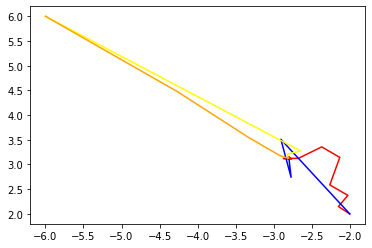

In [ ]:
plt.plot(liX0H, liY0H, color='red') # Nelder-Mead
plt.plot(liXhim, liYhim, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0HCG, liY0HCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0HNEWCG, liY0HNEWCG, color='orange') #Newton CG

#### ***Grafica de Optimización sobre las curvas de nivel***

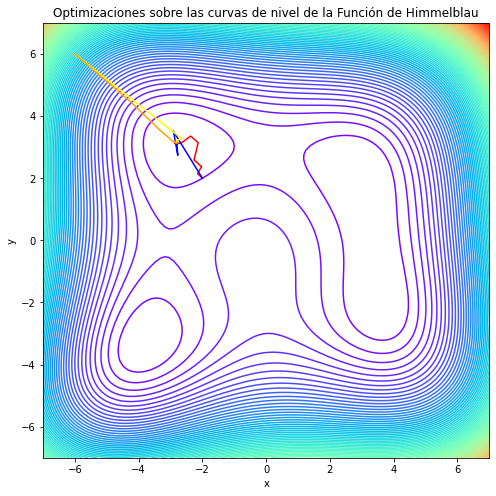

In [ ]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XH, YH, FH, 100, cmap="rainbow") #coolwarm linestyles="dotted"

plt.plot(liX0H, liY0H, color='red') # Nelder-Mead
plt.plot(liXhim, liYhim, color='blue') # Gradiente (Maximo Descenso)
plt.plot(liX0HCG, liY0HCG, color='yellow') # Gradiente Conjugado
plt.plot(liX0HNEWCG, liY0HNEWCG, color='orange') #Newton CG

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizaciones sobre las curvas de nivel de la Función de Himmelblau")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

#### ***Grafica de Error Absoluto***

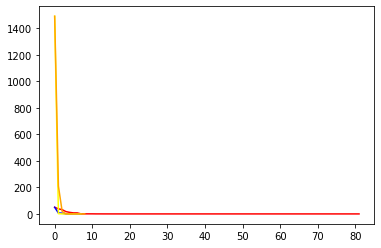

In [ ]:
# Errores Absolutos
plt.plot(np.abs(liF0H), color='red') # Nelder-Mead
plt.plot(np.abs(liFhim), color='blue') # Gradiente (Maximo Descenso)
plt.plot(np.abs(liF0HCG), color='yellow') # Gradiente Conjugado
plt.plot(np.abs(liF0HNEWCG), color='orange') #Newton CG

De la grafica de los Errores Absolutos en la funcion de Himmelblau podemos concluir lo siguiente:


1.   En el metodo de Nelder Mead el error se estabiliza en aproximadamente 7 iteracciones, comparado con el total de iteracciones que son 82, se estabiliza en un 8.5% de estas.
2.   En el metodo del Gradiente (Maximo Descenso) el error se estabiliza en aproximadamente 3 iteracciones de las 7 que utiliza, en un 42.9% de estas .
3.   En el metodo del Gradiente Conjugado el error se estabiliza aproximadamente en 1 iteracciones de las 7 que utiliza, en un 14.3% de estas.
4.   En el metodo de Newton CG el error se estabiliza aproximadamente en 3 iteracciones de las 8 que utiliza, en un 37.5% de estas.
5.   Podemos decir que el metodo que menos iteracciones utilizo para estabilizar el error fue el metodo del Gradiente Conjugado.
6.   Podemos decir que el metodo mas rapido comparado con el numero de iteracciones para estabilizar el error es el metodo Nelder Mead.

# **Referencias**

Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

https://dlegorreta.wordpress.com/tag/rosenbrock/

https://hmong.es/wiki/Nelder%E2%80%93Mead_method

http://www.scholarpedia.org/article/Nelder-Mead_algorithm